<a href="https://colab.research.google.com/github/LuciferX45/Deep-Learning-Labs/blob/main/DL_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DL LAB 5**
# **Gautam Padhi**
# I034 B2
# BTech AI SEM V


In [ ]:
from keras.datasets import imdb

In [ ]:
import numpy as np

In [ ]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [ ]:
#Make each review of equal dimensions - (25000x10000)
def equal_number(s,d = 10000):
  r = np.zeros((len(s), d))
  for i, sequence in enumerate(s):
    r[i, sequence] = 1
  return r

In [ ]:
x = np.concatenate((training_data,testing_data))
y = np.concatenate((training_targets,testing_targets))

In [ ]:
del training_data
del training_targets
del testing_data
del testing_targets

In [ ]:
x = equal_number(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [ ]:
del x
del y

In [ ]:
x_train.shape

(32500, 10000)

In [ ]:
x_test.shape

(17500, 10000)

In [ ]:
y_train.shape

(32500,)

In [ ]:
y_test.shape

(17500,)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
#Input
model.add(layers.Dense(50, activation = "relu", input_shape=(10000,)))
#Hidden
model.add(layers.Dense(50))
model.add(layers.LeakyReLU(alpha = 0.01))
model.add(layers.Dense(35, activation = "relu"))
#Output
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 35)                1785      
                                                                 
 dense_3 (Dense)             (None, 1)                 36        
                                                                 
Total params: 504,421
Trainable params: 504,421
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
results = model.fit(x_train,y_train,epochs = 20,validation_data=(x_test,y_test))

Epoch 1/20
1016/1016 [==============================] - 10s 9ms/step - loss: 0.3120 - accuracy: 0.8664 - val_loss: 0.2631 - val_accuracy: 0.8904
Epoch 2/20
1016/1016 [==============================] - 10s 10ms/step - loss: 0.1819 - accuracy: 0.9253 - val_loss: 0.2816 - val_accuracy: 0.8893
Epoch 3/20
1016/1016 [==============================] - 9s 9ms/step - loss: 0.1035 - accuracy: 0.9582 - val_loss: 0.4237 - val_accuracy: 0.8779
Epoch 4/20
1016/1016 [==============================] - 10s 10ms/step - loss: 0.0416 - accuracy: 0.9842 - val_loss: 0.5638 - val_accuracy: 0.8749
Epoch 5/20
1016/1016 [==============================] - 10s 10ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.7172 - val_accuracy: 0.8834
Epoch 6/20
1016/1016 [==============================] - 10s 10ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.6864 - val_accuracy: 0.8799
Epoch 7/20
1016/1016 [==============================] - 9s 8ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.9555 - val_

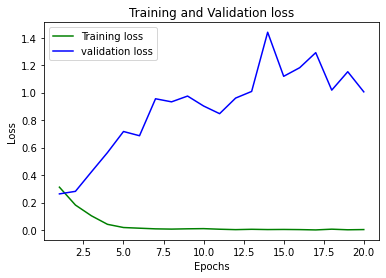

In [ ]:
import matplotlib.pyplot as plt
loss_train = results.history['loss']
loss_val = results.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

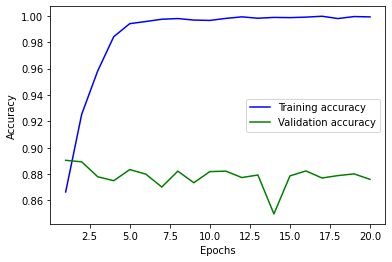

In [ ]:
acc_train = results.history['accuracy']
acc_val = results.history['val_accuracy']
plt.plot(epochs, acc_train, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
del results
del loss_train
del loss_val
del acc_train
del acc_val

#L1 Regularization

In [ ]:
model = models.Sequential()
#Input
model.add(layers.Dense(50, activation = "relu", input_shape=(10000,)))
#Hidden
model.add(layers.Dense(50, kernel_regularizer='l1'))
model.add(layers.LeakyReLU(alpha = 0.01))
model.add(layers.Dense(35, kernel_regularizer='l1', activation = "relu"))
#Output
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
results = model.fit(x_train,y_train,epochs = 20,validation_data=(x_test,y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                500050    
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 35)                1785      
                                                                 
 dense_7 (Dense)             (None, 1)                 36        
                                                                 
Total params: 504,421
Trainable params: 504,421
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1016/1016 [==========================

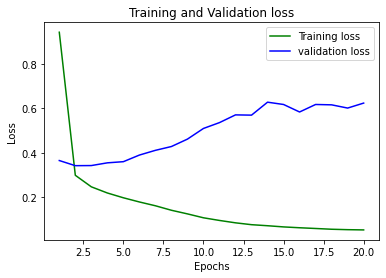

In [ ]:
loss_train = results.history['loss']
loss_val = results.history['val_loss']
epochs = [i for i in range(1,21)]
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

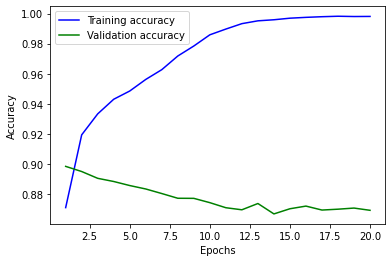

In [ ]:
acc_train = results.history['accuracy']
acc_val = results.history['val_accuracy']
plt.plot(epochs, acc_train, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
del results
del loss_train
del loss_val
del acc_train
del acc_val

#L2 Regulaziation

In [ ]:
model = models.Sequential()
#Input
model.add(layers.Dense(50, activation = "relu", input_shape=(10000,)))
#Hidden
model.add(layers.Dense(50, kernel_regularizer='l2'))
model.add(layers.LeakyReLU(alpha = 0.01))
model.add(layers.Dense(35, kernel_regularizer='l2', activation = "relu"))
#Output
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
results = model.fit(x_train,y_train,epochs = 20,validation_data=(x_test,y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                500050    
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 35)                1785      
                                                                 
 dense_11 (Dense)            (None, 1)                 36        
                                                                 
Total params: 504,421
Trainable params: 504,421
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1016/1016 [==========================

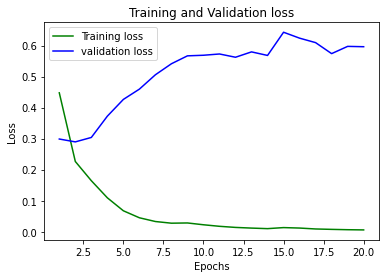

In [ ]:
loss_train = results.history['loss']
loss_val = results.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

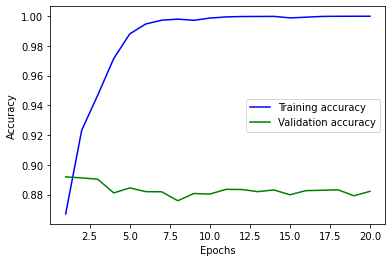

In [ ]:
acc_train = results.history['accuracy']
acc_val = results.history['val_accuracy']
plt.plot(epochs, acc_train, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
del results
del loss_train
del loss_val
del acc_train
del acc_val

#Droput Regularization

In [ ]:
model = models.Sequential()
#Input
model.add(layers.Dense(50, activation = "relu", input_shape=(10000,)))
#Hidden
model.add(layers.Dense(50))
model.add(layers.LeakyReLU(alpha = 0.01))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(35, activation = "relu"))
model.add(layers.Dropout(0.2))
#Output
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
results = model.fit(x_train,y_train,epochs = 20,validation_data=(x_test,y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                500050    
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 50)                0         
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 35)                1785      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

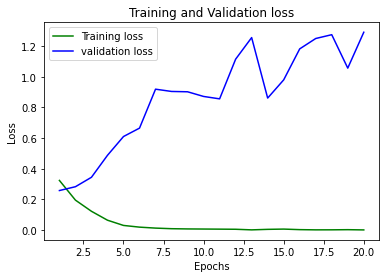

In [ ]:
import matplotlib.pyplot as plt
loss_train = results.history['loss']
loss_val = results.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

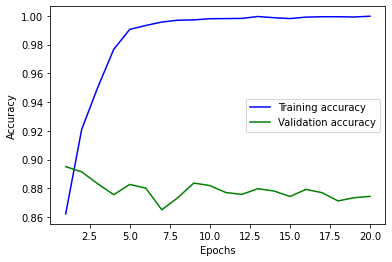

In [ ]:
acc_train = results.history['accuracy']
acc_val = results.history['val_accuracy']
plt.plot(epochs, acc_train, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()